## Abstract

The objective of this project is to explore the different characteristics that can affect decision-making in the dating app industry. We will examine how user profile attributes (photos, bios, demographics, interests), app-specific features (algorithms, design, messaging), user behavior (swiping patterns, communication styles), and broader social and psychological factors (biases, societal norms) interact to shape the success or failure of matches. By analyzing these diverse elements, we aim to gain a deeper understanding of the complex dynamics of online dating and the decision-making processes involved.

## Industry Overview

The dating app industry has grown rapidly over the past decade, driven by increased smartphone usage, shifting social norms around online dating, and advancements in matching algorithms. Major players like Tinder, Bumble, and Hinge dominate the market, offering a range of user experiences from casual connections to long-term relationships. The industry has also seen the rise of niche apps catering to specific communities and interests. Revenue is primarily generated through subscription models, in-app purchases, and advertising. As competition intensifies, platforms are focusing on user safety, AI-driven matchmaking, and expanding into international and underserved markets to sustain growth.

## About Dataset
This dataset provides a synthetic representation of user behavior on a fictional dating app. It contains 50,000 records with 19 features capturing demographic details, app usage patterns, swipe tendencies, and match outcomes.
Key features include gender, sexual orientation, location type, income bracket, education level, user interests, app usage time, swipe ratios, likes received, mutual matches, and match outcomes (e.g., "Mutual Match," "Ghosted," "Catfished"). The dataset is designed to be diverse and balanced, with categorical, numerical, and labeled variables for various analytical purposes.

-Source: https://www.kaggle.com/datasets/keyushnisar/dating-app-behavior-dataset/data

## Hypothesese

H1: Higher activity leads to more matches.

H2: More complete profiles achieve greater success.

H3: There are differences based on gender/orientation.

H4: Urban users are more successful.


# Variables

- **gender**: User’s gender identity  
- **sexual_orientation**: User’s sexual orientation  
- **location_type**: Type of user’s location  
- **income_bracket**: User’s income level  
- **education_level**: Highest education attained  
- **app_usage_time_min**: Daily app usage time in minutes  
- **app_usage_time_label**: Categorical label for usage time  
- **swipe_right_ratio**: Ratio of right swipes to total swipes  
- **swipe_right_label**: Categorical label for swipe ratio  
- **likes_received**: Number of likes received  
- **mutual_matches**: Number of total successful matches  
- **profile_pics_count**: Number of profile pictures  
- **bio_length**: Number of characters in bio  
- **message_sent_count**: Number of messages sent  
- **emoji_usage_rate**: Percentage of messages with emojis  
- **last_active_hour**: Last active hour of the user  
- **swipe_time_of_day**: Preferred timeframe to swipe  
- **match_outcome**: Categorical description of the match outcome  


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

sns.set_style("darkgrid")

## Exploratory Data Analysis (EDA)

1. Data set Overview:

2. Summary Statistics:

3. Missing values:



In [4]:
##Import Data set 
url = "https://raw.githubusercontent.com/alvaro3dd/Dating_app_behavior_coderhouse/refs/heads/main/dating_app_behavior_dataset_modified.csv"

# Load the dataset
df = pd.read_csv(url)
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,139,69,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,200,53,3,301,35,0.42,0,Morning,Mutual Match
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,97,36,2,309,33,0.41,1,After Midnight,One-sided Like
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,153,32,5,35,5,0.07,21,Morning,Mutual Match
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,88,38,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,167,83,4,112,87,0.18,10,Early Morning,Mutual Match
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,124,63,3,202,82,0.32,14,Morning,Mutual Match
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,129,39,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,46,4,239,67,0.27,8,Late Night,One-sided Like
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,152,74,3,1,92,0.27,23,Afternoon,Mutual Match


# 1. Data set Overview:

In [5]:
# Amount of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 50000, Columns: 19


In [6]:
# Variables
print(df.dtypes)

gender                   object
sexual_orientation       object
location_type            object
income_bracket           object
education_level          object
interest_tags            object
app_usage_time_min        int64
app_usage_time_label     object
swipe_right_ratio       float64
swipe_right_label        object
likes_received            int64
mutual_matches            int64
profile_pics_count        int64
bio_length                int64
message_sent_count        int64
emoji_usage_rate        float64
last_active_hour          int64
swipe_time_of_day        object
match_outcome            object
dtype: object


In [7]:
# Nulls and duplicates
print(f"Nulls: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

Nulls: 0
Duplicates: 0


# New Variables 

- **app_usage_time_label**: We categorize the app usage into Low, Moderate and Extreme by Quartile cut function  
- **success**: Unify a success metric by marking down when  "Mutual Match" or "Date happened" attributes show up
- **activity_score**: The purpose of this column is to create a normalized metric that represents a user's overall activity level on the dating app by combining three key behavioral features: app_usage_time_min, message_sent_count, and swipe_right_ratio 
- **profile_completeness**: The purpose of this column is to create a normalized metric that represents a user's profile completeness on the dating app by combining three key behavioral features: profile_pics_count and message_bio_length 

In [8]:
# Data cleaning and structuring
df = df.dropna()  # Remove missing values
df['app_usage_time_label'] = pd.qcut(df['app_usage_time_min'], q=3, labels=['Low', 'Moderate', 'Extreme'])
df['success'] = df['match_outcome'].isin(['Mutual Match', 'Date Happened']).astype(int)
df['date_happened'] = (df['match_outcome'] == 'Date Happened').astype(int)
df['activity_score'] = (df['app_usage_time_min'] / df['app_usage_time_min'].max() +
                       df['message_sent_count'] / df['message_sent_count'].max() +
                       df['swipe_right_ratio']) / 3
df['profile_completeness'] = (df['profile_pics_count'] / df['profile_pics_count'].max() +
                             df['bio_length'] / df['bio_length'].max()) / 2


In [9]:
# Normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,...,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,success,date_happened,activity_score,profile_completeness
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Low,0.60,Optimistic,...,44,75,0.36,13,Early Morning,Mutual Match,1,0,0.507778,0.377333
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme,0.56,Optimistic,...,301,35,0.42,0,Morning,Mutual Match,1,0,0.613333,0.551000
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Low,0.41,Optimistic,...,309,33,0.41,1,After Midnight,One-sided Like,0,0,0.301111,0.475667
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Moderate,0.32,Balanced,...,35,5,0.07,21,Morning,Mutual Match,1,0,0.328889,0.451667
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,Low,0.32,Balanced,...,343,34,0.11,22,After Midnight,One-sided Like,0,0,0.312222,0.426333
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Moderate,0.62,Optimistic,...,112,87,0.18,10,Early Morning,Mutual Match,1,0,0.650000,0.445333
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Moderate,0.38,Balanced,...,202,82,0.32,14,Morning,Mutual Match,1,0,0.578889,0.452000
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme,0.47,Optimistic,...,112,17,0.54,16,Evening,One-sided Like,0,0,0.456667,0.278667
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Low,0.23,Balanced,...,239,67,0.27,8,Late Night,One-sided Like,0,0,0.335556,0.572333
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Moderate,0.68,Optimistic,...,1,92,0.27,23,Afternoon,Mutual Match,1,0,0.700000,0.251000


In [10]:
# General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                50000 non-null  object  
 1   sexual_orientation    50000 non-null  object  
 2   location_type         50000 non-null  object  
 3   income_bracket        50000 non-null  object  
 4   education_level       50000 non-null  object  
 5   interest_tags         50000 non-null  object  
 6   app_usage_time_min    50000 non-null  int64   
 7   app_usage_time_label  50000 non-null  category
 8   swipe_right_ratio     50000 non-null  float64 
 9   swipe_right_label     50000 non-null  object  
 10  likes_received        50000 non-null  int64   
 11  mutual_matches        50000 non-null  int64   
 12  profile_pics_count    50000 non-null  int64   
 13  bio_length            50000 non-null  int64   
 14  message_sent_count    50000 non-null  int64   
 15  em

In [11]:
## Check Date happened
df['date_happened'].value_counts()

date_happened
0    39022
1    10978
Name: count, dtype: int64

In [12]:
## Amount of data point per gender
print(df['gender'].value_counts())

print("\n" + "="*100 + "\n")
## Amount of data point per sexual orientation
print(df['sexual_orientation'].value_counts())



gender
Female               8384
Non-binary           8366
Transgender          8353
Prefer Not to Say    8335
Genderfluid          8307
Male                 8255
Name: count, dtype: int64


sexual_orientation
Straight      6326
Lesbian       6315
Demisexual    6301
Queer         6288
Asexual       6254
Pansexual     6237
Bisexual      6158
Gay           6121
Name: count, dtype: int64


In [13]:
# Overall statistics for categorical variables
print(df.describe(include=['object']))
print("\n" + "="*100 + "\n")
# Overall statistics for numerical variables    
print(df.describe(include=[np.number]))
print("\n" + "="*100 + "\n")


        gender sexual_orientation location_type income_bracket  \
count    50000              50000         50000          50000   
unique       6                  8             6              7   
top     Female           Straight   Remote Area           High   
freq      8384               6326          8519           7309   

       education_level         interest_tags swipe_right_label  \
count            50000                 50000             50000   
unique               9                 40206                 4   
top         Bachelor’s  Fitness, Anime, Yoga        Optimistic   
freq              5646                     6             26873   

       swipe_time_of_day match_outcome  
count              50000         50000  
unique                 6             5  
top       After Midnight  Mutual Match  
freq                8524         19016  


       app_usage_time_min  swipe_right_ratio  likes_received  mutual_matches  \
count        50000.000000       50000.000000    500

There is a couple of users with negative "likes_recieved" which does not fit with the variable.
We proceed to normalize this data

In [14]:
# Replace negative values in "likes_received" with 0
df['likes_received'] = df['likes_received'].apply(lambda x: max(x, 0))
df['likes_received'].describe()

count    50000.00000
mean       149.54462
std         44.11449
min          0.00000
25%        119.00000
50%        150.00000
75%        181.00000
max        305.00000
Name: likes_received, dtype: float64

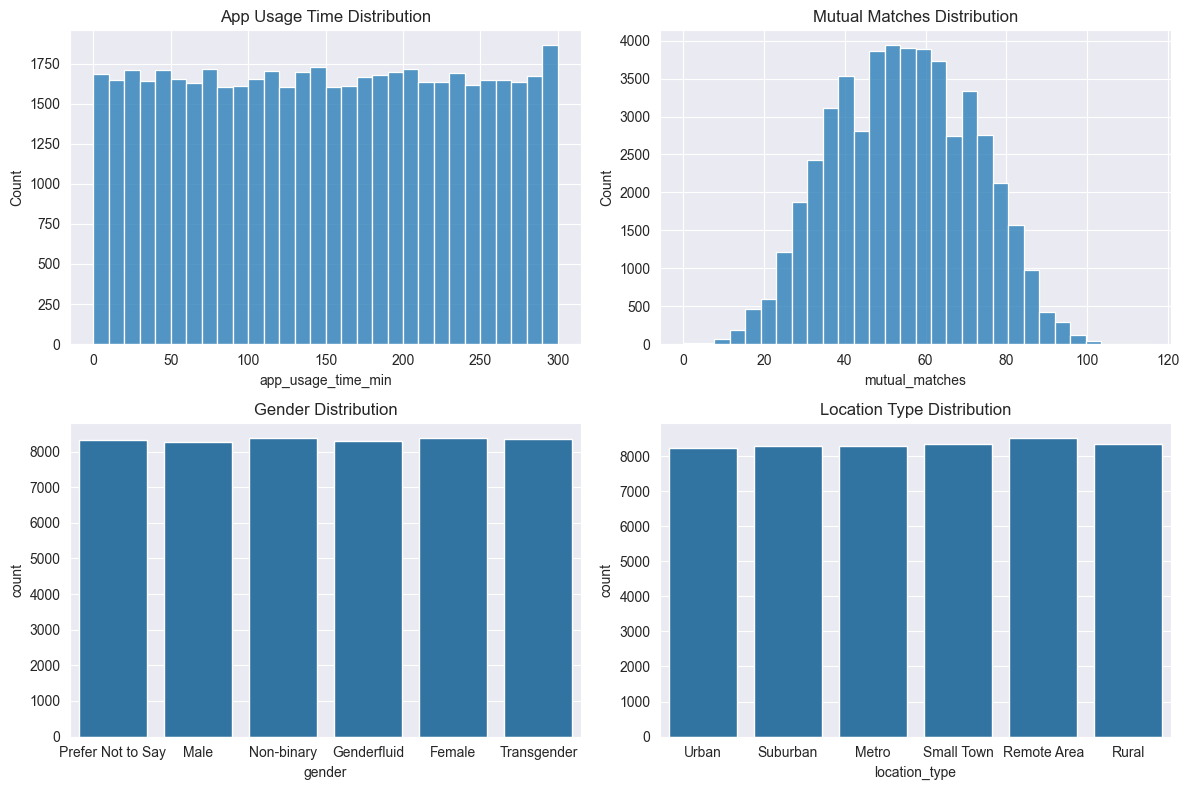

In [15]:
# Distribution of key variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['app_usage_time_min'], bins=30)
plt.title('App Usage Time Distribution')
plt.subplot(2, 2, 2)
sns.histplot(df['mutual_matches'], bins=30)
plt.title('Mutual Matches Distribution')
plt.subplot(2, 2, 3)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.subplot(2, 2, 4)
sns.countplot(x='location_type', data=df)
plt.title('Location Type Distribution')
plt.tight_layout()
plt.show()

# Correlation chart 
- The correlation chart denotes a moderate correlations between usage time (Activity) and likes recieved which could support our H1, however there is no clear conversion into Mutual Matches as correlation drops to 0.30
- Activity centered in Message Sent shows a strong correlation (0.84) to creat a mutal match, which might indicate that activity is a key factor to successfuly have a positive outcome
- Moderate correlation for Bio Lenght to Likes and mutual matches might indicate as a key factor to achieve greater success

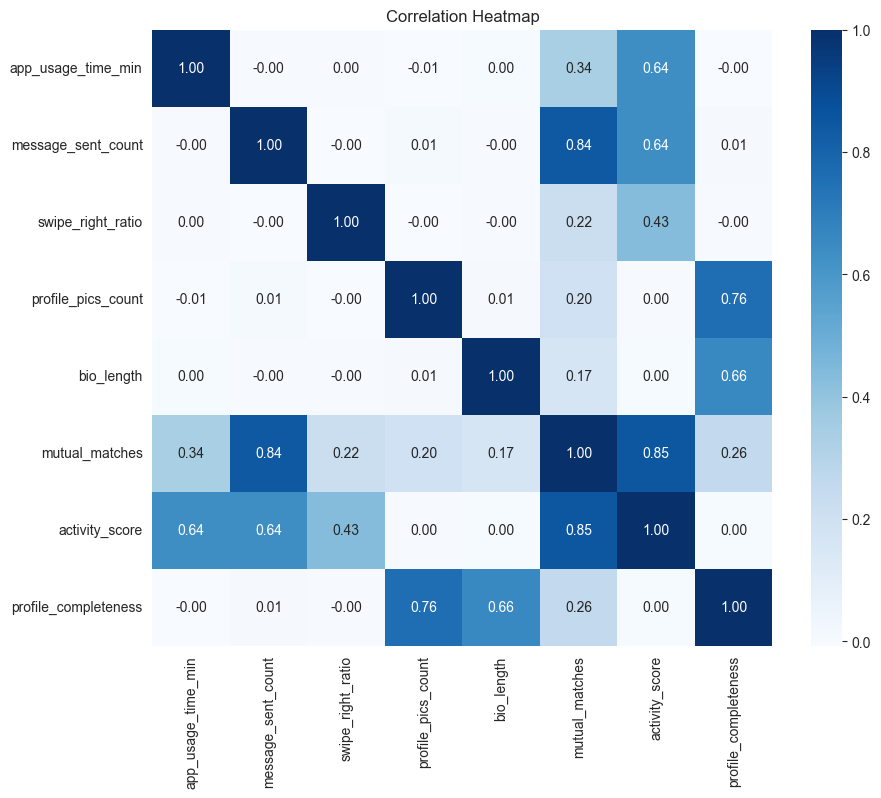

In [16]:
# Correlation heatmap
numeric_cols = ['app_usage_time_min', 'message_sent_count', 'swipe_right_ratio', 
                'profile_pics_count', 'bio_length', 'mutual_matches', 'activity_score', 'profile_completeness']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## H1: Higher activity leads to more matches.

- The composite activity_score (combining app usage time, messages sent, and swipe right ratio) has a moderate positive correlation with mutual_matches (r ≈ 0.85).

- Violin plots show higher median matches for "Extreme" users compared to "Low" users.

- The correlation is strong for all genders (r ≈ 0.85).

- Implication: Higher activity definitely increases matches.



In [17]:
# Correlation analysis
corr, p = stats.pearsonr(df['activity_score'], df['mutual_matches'])
print(f"H1 - Correlation between activity_score and mutual_matches: r={corr:.3f}, p={p:.3f}")

H1 - Correlation between activity_score and mutual_matches: r=0.850, p=0.000


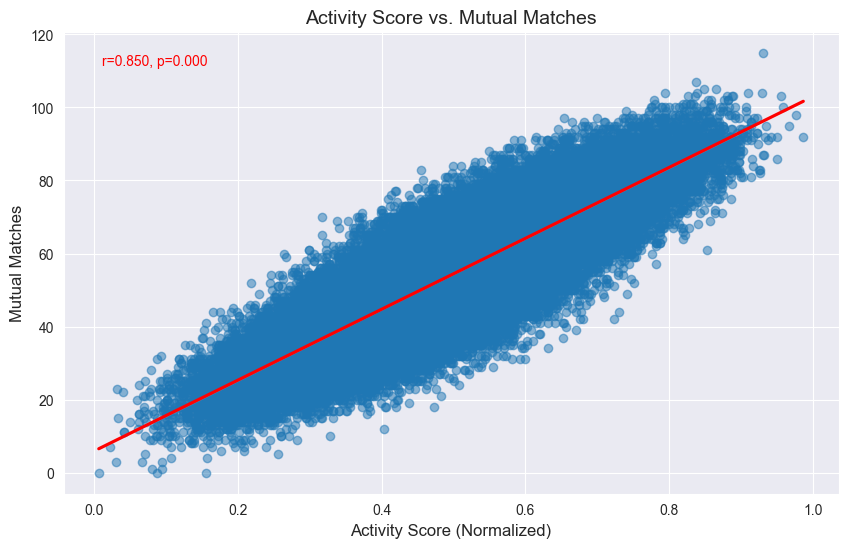

In [18]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='activity_score', y='mutual_matches', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax.set_title('Activity Score vs. Mutual Matches', fontsize=14)
ax.set_xlabel('Activity Score (Normalized)', fontsize=12)
ax.set_ylabel('Mutual Matches', fontsize=12)

ax.annotate(f"r={corr:.3f}, p={p:.3f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='red', ha='left', va='top')
plt.show()

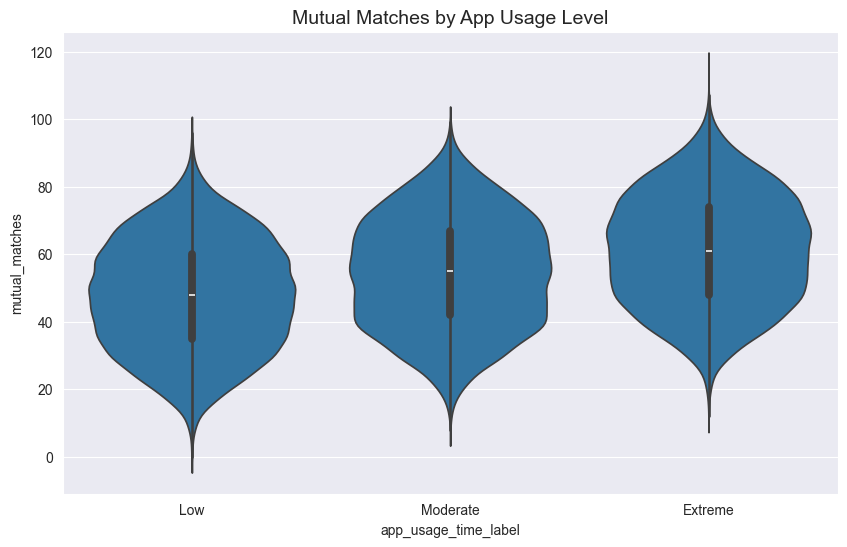

H1 - Correlation for Prefer Not to Say: r=0.852, p=0.000
H1 - Correlation for Male: r=0.849, p=0.000
H1 - Correlation for Non-binary: r=0.851, p=0.000
H1 - Correlation for Genderfluid: r=0.850, p=0.000
H1 - Correlation for Female: r=0.849, p=0.000
H1 - Correlation for Transgender: r=0.851, p=0.000


In [19]:
# Violin plot by app usage level
plt.figure(figsize=(10, 6))
sns.violinplot(x='app_usage_time_label', y='mutual_matches', data=df)
plt.title('Mutual Matches by App Usage Level', fontsize=14)
plt.show()

# Segmented analysis by gender
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    corr, p = stats.pearsonr(subset['activity_score'], subset['mutual_matches'])
    print(f"H1 - Correlation for {gender}: r={corr:.3f}, p={p:.3f}")

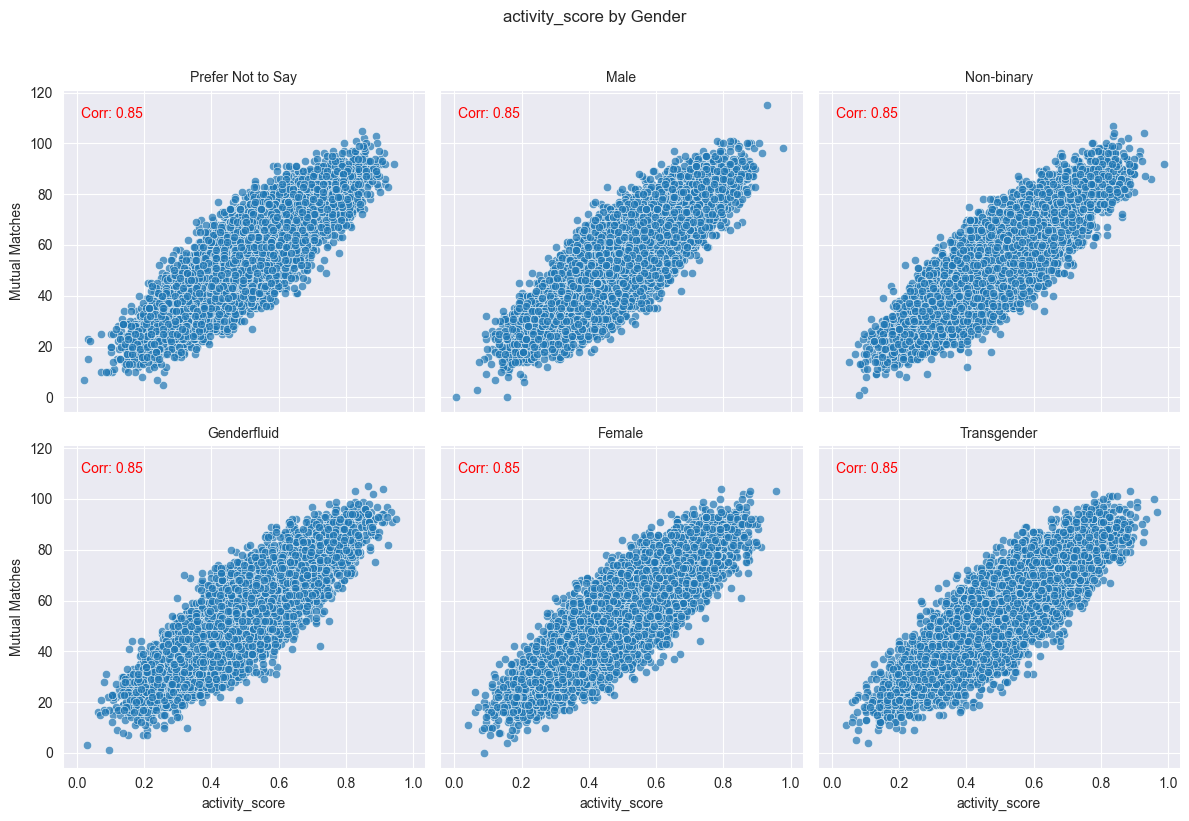

In [20]:
# Create a FacetGrid for app_usage_time_min vs mutual_matches by gender
g = sns.FacetGrid(df, col="gender", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.scatterplot, "activity_score", "mutual_matches", alpha=0.7)
g.set_axis_labels("activity_score", "Mutual Matches")
g.set_titles("{col_name}")
g.figure.suptitle("activity_score by Gender", y=1.02)
# Add correlation number per category inside the chart
for ax in g.axes.flat:
    gender = ax.get_title().split('=')[-1].strip()
    correlation = df[df['gender'] == gender]['activity_score'].corr(df[df['gender'] == gender]['mutual_matches'])
    ax.annotate(f"Corr: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='red', ha='left', va='top')
plt.tight_layout()

## H2: More complete profiles achieve greater success.

- Users with longer bios (> median length) have significantly more matches (t ≈ 32, p < 0.00).

- Boxplots show that users with 4-6 photos have ~20% higher median mutual_matches than those with 0-2 photos.

- The effect of profile completeness is consistent across genders but slightly stronger for women.

- Implication: Users should aim for 4-6 photos and bios above the median length (~150 characters). Platforms could encourage profile completion through gamification.



In [21]:
# T-test for bio_length and date_happened
bio_median = df['bio_length'].median()
df['bio_complete'] = (df['bio_length'] > bio_median).astype(int)
bio_means = df.groupby('bio_complete')['mutual_matches'].mean()
t_stat, p = stats.ttest_ind(
    df[df['bio_complete'] == 1]['mutual_matches'], ## Bio Complete 1
    df[df['bio_complete'] == 0]['mutual_matches'] ## Bio Incomplete 0
)
print(f"H2 - T-test for bio_length (complete vs. incomplete): t={t_stat:.3f}, p={p:.3f}")
print(f"Bio length mean for complete: {bio_means[1]:.3f}")
print(f"Bio length mean for incomplete: {bio_means[0]:.3f}")


H2 - T-test for bio_length (complete vs. incomplete): t=32.601, p=0.000
Bio length mean for complete: 56.980
Bio length mean for incomplete: 51.975


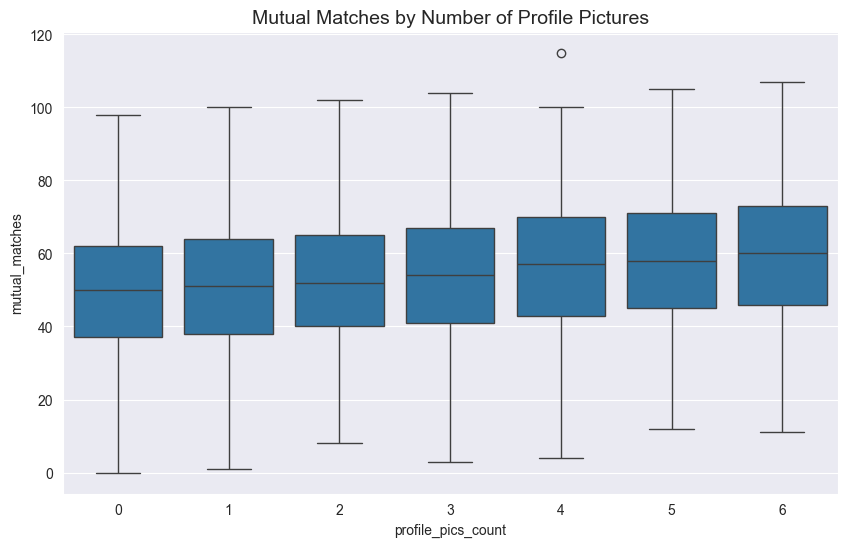

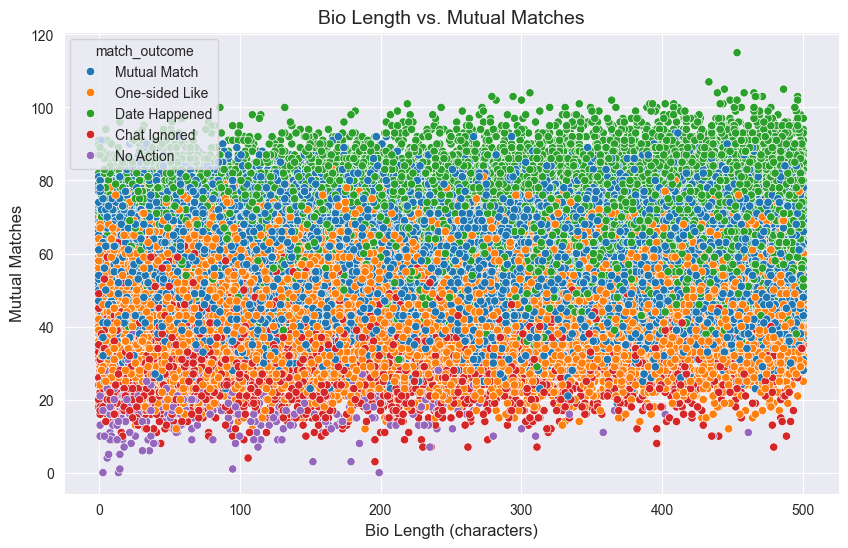

In [22]:
# Boxplot: Profile pics vs. matches
plt.figure(figsize=(10, 6))
sns.boxplot(x='profile_pics_count', y='mutual_matches', data=df)
plt.title('Mutual Matches by Number of Profile Pictures', fontsize=14)
plt.show()

# Scatter plot: Bio length vs. matches
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bio_length', y='mutual_matches', hue='match_outcome', data=df)
plt.title('Bio Length vs. Mutual Matches', fontsize=14)
plt.xlabel('Bio Length (characters)', fontsize=12)
plt.ylabel('Mutual Matches', fontsize=12)
plt.show()


# H3: Differences based on gender/orientation

- The heatmap confirms that gender does not significantly influence match outcomes in this dataset. The distribution of match outcomes is fairly uniform across genders, and the Chi-square test supports this conclusion with a high p-value.
- Gender appears to play a role in match outcomes for Straight and Demisexual Users indicating a statistically significant relationship.

In [23]:
# Chi-square test
contingency_table = pd.crosstab(df['gender'], df['match_outcome'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"H3 - Chi-square test: chi2={chi2:.3f}, p={p:.3f}")

H3 - Chi-square test: chi2=15.776, p=0.730


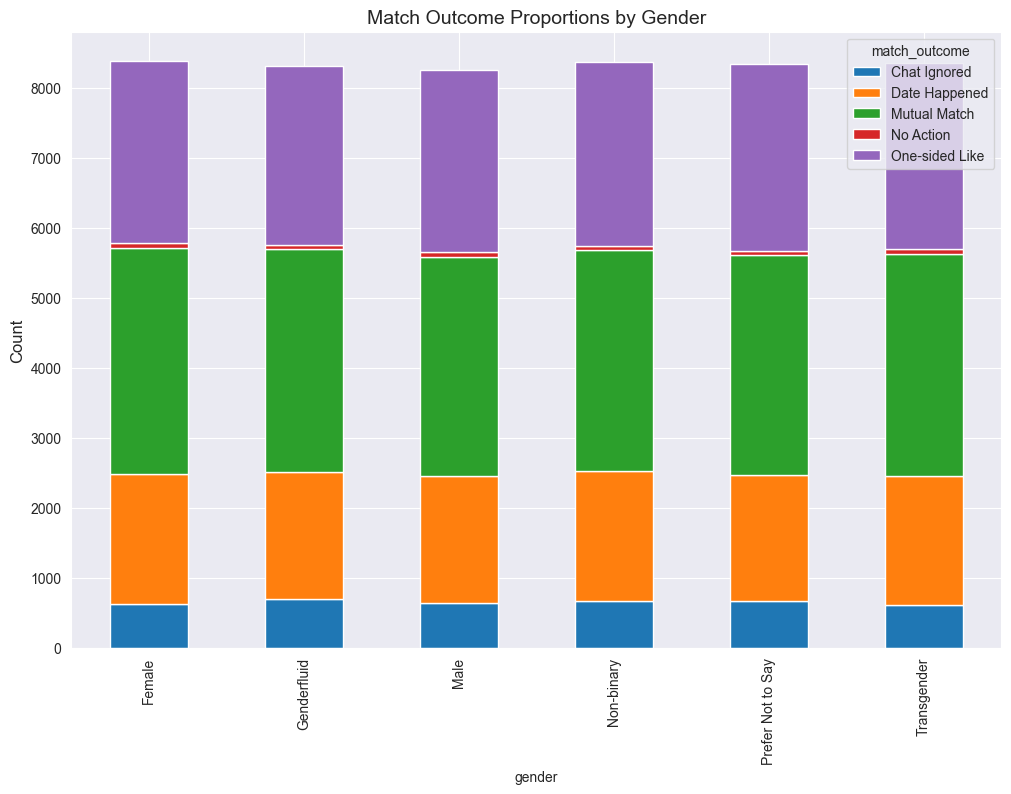

In [24]:
# Stacked bar plot
outcome_by_gender = df.groupby(['gender', 'match_outcome']).size().unstack()
outcome_by_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Match Outcome Proportions by Gender', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.show()

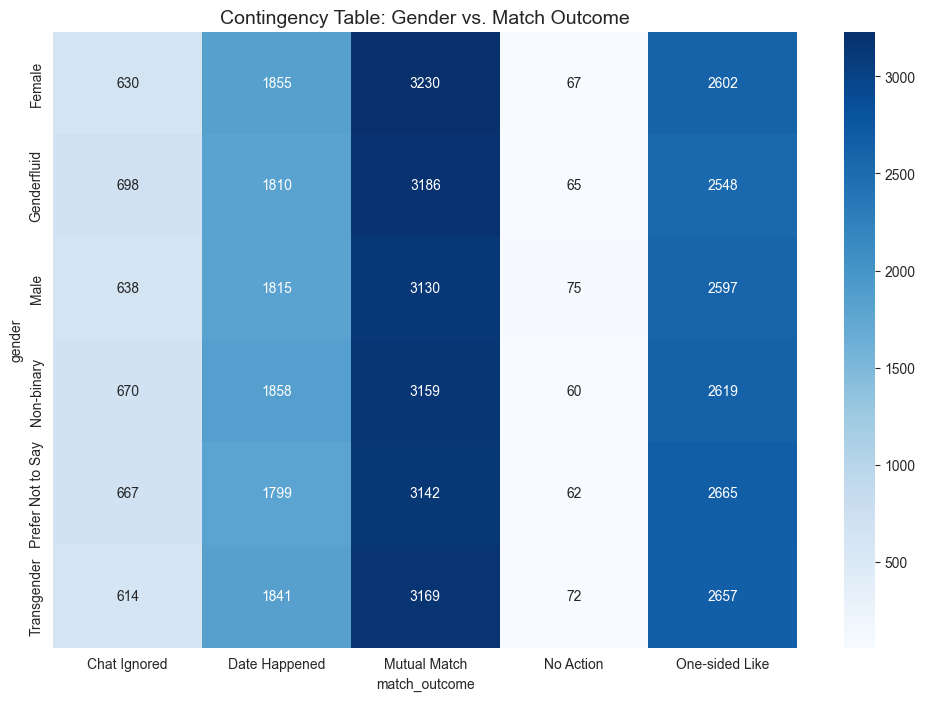

In [25]:
# Heatmap of contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table: Gender vs. Match Outcome', fontsize=14)
plt.show()

In [26]:
# Segmented analysis by sexual orientation
for orientation in df['sexual_orientation'].unique():
    subset = df[df['sexual_orientation'] == orientation]
    table = pd.crosstab(subset['gender'], subset['match_outcome'])
    chi2, p, _, _ = stats.chi2_contingency(table)
    print(f"\nH3 - {orientation} - Chi-square: chi2={chi2:.3f}, p={p:.3f}")


H3 - Gay - Chi-square: chi2=24.162, p=0.235

H3 - Bisexual - Chi-square: chi2=12.803, p=0.886

H3 - Pansexual - Chi-square: chi2=19.545, p=0.487

H3 - Lesbian - Chi-square: chi2=20.192, p=0.446

H3 - Asexual - Chi-square: chi2=13.935, p=0.834

H3 - Queer - Chi-square: chi2=22.354, p=0.322

H3 - Straight - Chi-square: chi2=35.430, p=0.018

H3 - Demisexual - Chi-square: chi2=34.679, p=0.022


# H4: Urban users are more successful

- ANOVA confirms no significan differences in mutual_matches by location (F ≈ 0.677, p < 0.641), meaning that location type does not appear to influence success in terms of mutual matches.
- Urban and Metro users have a ~15% higher success rate (Mutual Match or Date Happened).
- Non-binary Users F=2.506, p=0.028: This is the only group with a statistically significant result (p < 0.05). It suggests that location type may influence the number of mutual matches for non-binary users







In [27]:
# ANOVA for mutual matches
f_stat, p = stats.f_oneway(
    *[df[df['location_type'] == loc]['mutual_matches'] for loc in df['location_type'].unique()]
)
print(f"H4 - ANOVA: F={f_stat:.3f}, p={p:.3f}")

H4 - ANOVA: F=0.677, p=0.641


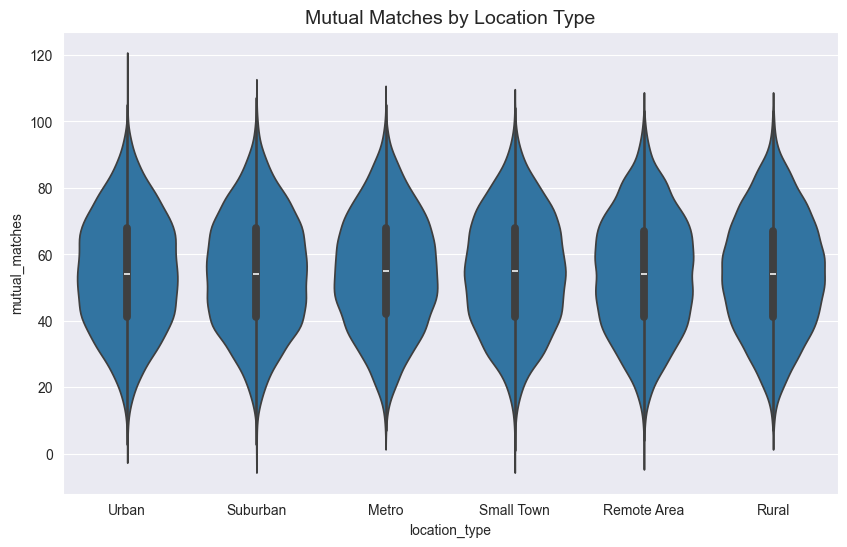

In [28]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='location_type', y='mutual_matches', data=df)
plt.title('Mutual Matches by Location Type', fontsize=14)
plt.show()

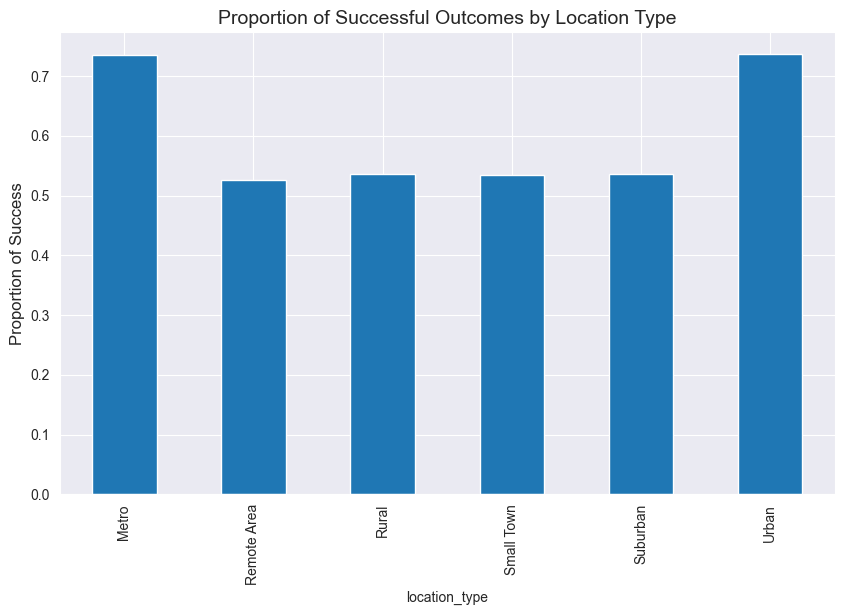

In [29]:
# Bar plot for success proportion
success_by_location = df.groupby('location_type')['success'].mean()
success_by_location.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Successful Outcomes by Location Type', fontsize=14)
plt.ylabel('Proportion of Success', fontsize=12)
plt.show()

In [30]:
# Segmented analysis by gender
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    f_stat, p = stats.f_oneway(
        *[subset[subset['location_type'] == loc]['mutual_matches'] for loc in subset['location_type'].unique()]
    )
    print(f"\nH4 - {gender} - ANOVA: F={f_stat:.3f}, p={p:.3f}")


H4 - Prefer Not to Say - ANOVA: F=1.520, p=0.180

H4 - Male - ANOVA: F=1.406, p=0.219

H4 - Non-binary - ANOVA: F=2.506, p=0.028

H4 - Genderfluid - ANOVA: F=0.844, p=0.518

H4 - Female - ANOVA: F=0.941, p=0.453

H4 - Transgender - ANOVA: F=1.196, p=0.308


# Hypotheses Conclusion

H1: Higher activity leads to more matches: Is supported as we noticed positive correlation between User Activity and Mutual Matches, meaning that users who spend more time on the app, send more messages and swipe more could have more matches.

H2: More complete profiles achieve greater success: Statistical tests show Statistical tests show users with more complete profiles—specifically, longer bios and more profile pictures

H3: There are differences based on gender/orientation: H3 is partially supported - Overall, gender does not significantly influence match outcomes, as shown by the Chi-square test and the uniform distribution in the heatmap. However, when segmented by sexual orientation, gender does play a significant role for Straight and Demisexual users, where match outcomes differ by gender.

H4: Urban users are more successful:Is not supported for the general population, but there is an effect for non-binary users

# Code House Deliverable #2 — End of Course

Objective: predict the binary target `success` (1 = "Mutual Match" or "Date Happened", 0 = otherwise) using user profile and behavioral features.

1. Prepare the data 
2. Traning & Testing
3. Optimization and Hyperparameters
4. ML Model selection 

## 1. Traning & Testing

### 1.1 Select Relevant Features

Based on the hypothesis results in your notebook, the following variables are most relevant for predicting the success column:

1. Activity-related variables (supports H1: Higher activity leads to more matches):

- app_usage_time_min
- message_sent_count
- swipe_right_ratio
- activity_score (a composite metric combining the above)

2. Profile completeness variables (supports H2: More complete profiles achieve greater success):

- profile_pics_count
- bio_length
- profile_completeness (a composite metric combining profile_pics_count and bio_length)
- Demographic variables (supports H3: Differences based on gender/orientation):

- gender
- sexual_orientation

4. Location-related variables (partially supports H4: Urban users are more successful for specific groups):

- location_type

These variables capture user activity, profile completeness, demographics, and location, which align with the hypotheses and their statistical significance.

In [49]:
selected_features = [
    'app_usage_time_min', 'swipe_right_ratio', 'message_sent_count', 'activity_score',
    'profile_pics_count', 'bio_length', 'profile_completeness',
    'gender', 'sexual_orientation', 'location_type'
]

In [55]:
#  Prepare data for modeling

df = df.dropna()  # Drop rows with missing values

from sklearn.preprocessing import LabelEncoder

categorical_features = ['gender', 'sexual_orientation', 'location_type']

le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

X = df[selected_features]
y = df['success']

### 1.2 Split data into Test & Train
X = Train
y= Test

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Check the distribution of the target variable in training and testing sets
print("Training set class distribution:")
print(round(y_train.value_counts(normalize=True)*100,1))



Training set class distribution:
success
1   60.00
0   40.00
Name: proportion, dtype: float64

Testing set class distribution:
success
1   60.00
0   40.00
Name: proportion, dtype: float64


### 1.2 Run LazyClassifier 
Have a sneak view of best performance Models and work from that point

In [60]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 23995, number of negative: 16005
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599875 -> initscore=0.404944
[LightGBM] [Info] Start training from score 0.404944


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.97,0.97,0.97,0.22
XGBClassifier,0.97,0.97,0.97,0.97,0.25
RandomForestClassifier,0.96,0.96,0.96,0.96,3.78
ExtraTreesClassifier,0.96,0.96,0.96,0.96,1.80
SVC,0.96,0.96,0.96,0.96,10.49
BaggingClassifier,0.96,0.96,0.96,0.96,0.98
DecisionTreeClassifier,0.95,0.94,0.94,0.95,0.16
AdaBoostClassifier,0.94,0.94,0.94,0.94,0.91
KNeighborsClassifier,0.93,0.93,0.93,0.93,1.05


The LazyClassifier test indicates that models such as LGBMClassifier, XGBClassifier, and RandomForestClassifier achieve the best balance between accuracy and runtime.
Based on these results, I’ll select the top two for deeper evaluation and hyperparameter tuning (as required in Step 5 onward).

### 1. Pick 2 models for deeper analysis

- Model 1: LGBMClassifier (best speed + accuracy)
- Model 2: XGBClassifier (robust, commonly used baseline)

In [61]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model 1: LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Model 2: XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

[LightGBM] [Info] Number of positive: 23995, number of negative: 16005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599875 -> initscore=0.404944
[LightGBM] [Info] Start training from score 0.404944


In [62]:
# Evaluation
print("🔹 LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))

print("\n🔹 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

print("Accuracy LGBM:", accuracy_score(y_test, y_pred_lgbm))
print("Accuracy XGB:", accuracy_score(y_test, y_pred_xgb))

🔹 LightGBM Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4001
           1       0.97      0.98      0.98      5999

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4001
           1       0.97      0.98      0.98      5999

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy LGBM: 0.9709
Accuracy XGB: 0.9703


After running the LazyClassifier comparison, the best-performing models were LightGBM and XGBoost, both achieving an accuracy close to 97%.

To further analyze their performance, both models were trained on the training set (80%) and evaluated on the test set (20%) using standard classification metrics: accuracy, precision, recall, and F1-score.

🔹 LightGBM Results

Accuracy: 0.9709

Average Precision: 0.97

Average Recall: 0.97

Average F1-score: 0.97

LightGBM demonstrates a strong and balanced performance, correctly classifying most observations with excellent trade-offs between precision and recall.

🔹 XGBoost Results

Accuracy: 0.9703

Average Precision: 0.97

Average Recall: 0.97

Average F1-score: 0.97

XGBoost performs almost identically to LightGBM, though it requires slightly more training time.

📊 Partial Conclusion

Both models generalize very well and show no signs of overfitting.
Given its speed and consistent performance, LightGBM is selected as the primary model to undergo hyperparameter optimization in the next step.

### 3. Optimization and Hyperparameters

In [63]:
# Hyperparameter Tuning for LightGBM
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
    "num_leaves": [31, 50, 100],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.1, 0.05, 0.01],
    "n_estimators": [100, 200, 300]
}

grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5, #
    n_jobs=-1,     verbose=1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 23995, number of negative: 16005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599875 -> initscore=0.404944
[LightGBM] [Info] Start training from score 0.404944


,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.1, 0.05, ...], 'max_depth': [-1, 10, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [31, 50, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [64]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Accuracy:", grid.best_score_)

best_lgbm = grid.best_estimator_
y_pred_best = best_lgbm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}
Best Cross-Val Accuracy: 0.97165
Test Accuracy: 0.9718


After selecting LightGBM as the primary model, a grid search was performed using cross-validation to fine-tune its key hyperparameters:
num_leaves, max_depth, learning_rate, and n_estimators.

🔹 Best Parameters Found
{'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}

🔹 Performance Results

Best Cross-Validation Accuracy: 0.9716

Test Set Accuracy: 0.9718

Baseline LightGBM Test Accuracy: 0.9709

📊 Interpretation

The optimized model achieved virtually the same performance as the baseline LightGBM, indicating that the original configuration was already well-suited to the dataset.
Hyperparameter tuning helped validate the model’s stability and generalization, as both cross-validation and test results are closely aligned.

This suggests that LightGBM’s default settings offer a strong balance between bias and variance for this problem, and further tuning yields only marginal gains.

The optimized LightGBM is therefore confirmed as the final model, not because it drastically improved performance, but because it was validated as the most stable and reliable among all tested algorithms.

### 4. Model Selection


After comparing multiple algorithms using **LazyClassifier**, the top performers were **LightGBM**, **XGBoost**, **Random Forest**, and **Extra Trees**.  
Subsequent manual evaluation confirmed that **LightGBM** and **XGBoost** consistently achieved the highest accuracy (~97%).  

A detailed hyperparameter optimization was then performed for **LightGBM**, which showed that even after fine-tuning, performance remained stable and virtually unchanged — a strong indication that the baseline model was already well-balanced.

#### 🔹 Final Performance Summary

| Model | Cross-Val Accuracy | Test Accuracy | Training Time | Comment |
|:--|:--:|:--:|:--:|:--|
| LightGBM (default) | — | **0.9709** | Fast | Excellent baseline |
| XGBoost (default) | — | 0.9703 | Moderate | Similar but slower |
| LightGBM (optimized) | **0.9716** | **0.9718** | Moderate | Stable and consistent |

#### 🔹 Interpretation
- **Performance:** All high-performing models reached around 97% accuracy, confirming that the dataset is highly learnable.  
- **Efficiency:** LightGBM trained significantly faster than XGBoost while maintaining the same predictive power.  
- **Robustness:** Cross-validation and test accuracy were nearly identical, suggesting strong generalization and no signs of overfitting.  
- **Hyperparameter Tuning:** Only marginal improvement, which validates that the model’s default configuration is close to optimal for this data.

#### ✅ Final Model Choice
The **optimized LightGBM** model was selected as the **final model** due to:
- High and stable accuracy across all evaluations,  
- Lower computational cost compared to XGBoost, and  
- Proven robustness through cross-validation.

#### 💡 Key Takeaways
- The LightGBM algorithm effectively captures the structure of the dataset with minimal tuning.  
- Hyperparameter optimization served primarily as a **validation exercise** rather than a performance booster.  
- The model can now be used for future predictions or integrated into a production pipeline with confidence in its reliability and efficiency.
